In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lung Cancer.csv')
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [ ]:
print(df['cancer_stage'].unique())

['Stage I' 'Stage III' 'Stage IV' 'Stage II']


In [ ]:
df['cancer_stage'].replace(['Stage I', 'Stage II', 'Stage III', 'Stage IV'],[1,2,3,4],inplace=True)

/tmp/ipython-input-1170493382.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cancer_stage'].replace(['Stage I', 'Stage II', 'Stage III', 'Stage IV'],[1,2,3,4],inplace=True)
/tmp/ipython-input-1170493382.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cancer_stage'].replace(['Stage I

In [ ]:
print(df['smoking_status'].unique())

['Passive Smoker' 'Former Smoker' 'Never Smoked' 'Current Smoker']


In [ ]:
print(df['treatment_type'].unique())

['Chemotherapy' 'Surgery' 'Combined' 'Radiation']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['gender']=le.fit_transform(df['gender'])
df['country']=le.fit_transform(df['country'])
df['family_history']=le.fit_transform(df['family_history'])
df['smoking_status']=le.fit_transform(df['smoking_status'])
df['treatment_type']=le.fit_transform(df['treatment_type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  int64  
 3   country             890000 non-null  int64  
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  int64  
 6   family_history      890000 non-null  int64  
 7   smoking_status      890000 non-null  int64  
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  int64  
 15  end_treatment_date  890000 non-nul

In [ ]:
df['diagnosis_date']=pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date']=pd.to_datetime(df['end_treatment_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  890000 non-null  int64         
 1   age                 890000 non-null  float64       
 2   gender              890000 non-null  int64         
 3   country             890000 non-null  int64         
 4   diagnosis_date      890000 non-null  datetime64[ns]
 5   cancer_stage        890000 non-null  int64         
 6   family_history      890000 non-null  int64         
 7   smoking_status      890000 non-null  int64         
 8   bmi                 890000 non-null  float64       
 9   cholesterol_level   890000 non-null  int64         
 10  hypertension        890000 non-null  int64         
 11  asthma              890000 non-null  int64         
 12  cirrhosis           890000 non-null  int64         
 13  other_cancer        890000 no

In [ ]:
df['diagnosis.year']=df['diagnosis_date'].dt.year
df['diagnosis.month']=df['diagnosis_date'].dt.month
df['diagnosis.day']=df['diagnosis_date'].dt.day
df.drop('diagnosis_date',axis=1,inplace=True)

df['treatment_end_year']=df['end_treatment_date'].dt.year
df['treatment_end_month']=df['end_treatment_date'].dt.month
df['treatment_end_day']=df['end_treatment_date'].dt.day
df.drop('end_treatment_date',axis=1,inplace=True)

In [ ]:
df

,id,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,...,cirrhosis,other_cancer,treatment_type,survived,diagnosis.year,diagnosis.month,diagnosis.day,treatment_end_year,treatment_end_month,treatment_end_day
0,1,64.0,1,26,1,1,3,29.4,199,0,...,1,0,0,0,2016,4,5,2017,9,10
1,2,50.0,0,19,3,1,3,41.2,280,1,...,0,0,3,1,2023,4,20,2024,6,17
2,3,65.0,0,12,3,1,1,44.0,268,1,...,0,0,1,0,2023,4,5,2024,4,9
3,4,51.0,0,1,1,0,3,43.0,241,1,...,0,0,0,0,2016,2,5,2017,4,23
4,5,37.0,1,17,1,0,3,19.7,178,0,...,0,0,1,0,2023,11,29,2025,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,18,4,0,3,44.8,243,1,...,1,0,2,0,2022,7,1,2023,2,23
889996,889997,62.0,0,4,2,1,1,21.6,240,0,...,0,0,3,0,2015,9,27,2017,6,19
889997,889998,48.0,0,7,3,1,2,38.6,242,1,...,0,0,1,1,2016,3,27,2017,1,23
889998,889999,67.0,0,23,4,1,1,18.6,194,1,...,0,0,0,0,2015,12,22,2017,12,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   890000 non-null  int64  
 1   age                  890000 non-null  float64
 2   gender               890000 non-null  int64  
 3   country              890000 non-null  int64  
 4   cancer_stage         890000 non-null  int64  
 5   family_history       890000 non-null  int64  
 6   smoking_status       890000 non-null  int64  
 7   bmi                  890000 non-null  float64
 8   cholesterol_level    890000 non-null  int64  
 9   hypertension         890000 non-null  int64  
 10  asthma               890000 non-null  int64  
 11  cirrhosis            890000 non-null  int64  
 12  other_cancer         890000 non-null  int64  
 13  treatment_type       890000 non-null  int64  
 14  survived             890000 non-null  int64  
 15  diagnosis.year   

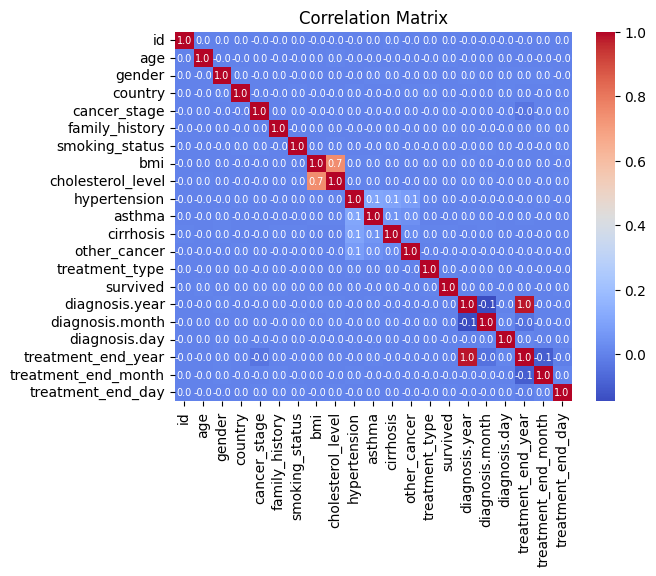

In [ ]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',cmap='coolwarm',annot_kws={'size':7})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop('bmi',axis=1,inplace=True)

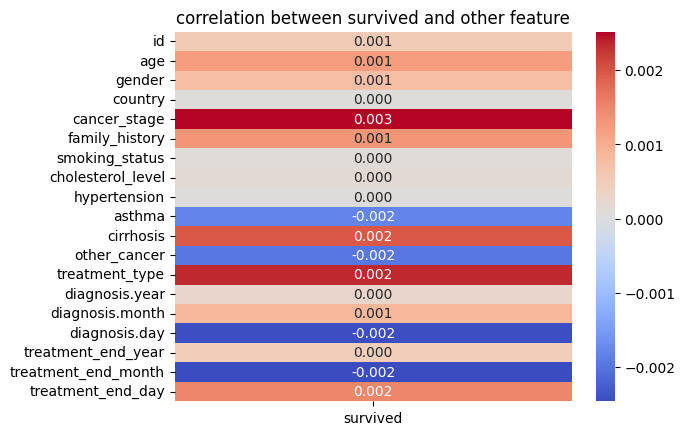

In [ ]:
survived_corr=df.corr()['survived']
survived_corr=survived_corr.drop('survived')

sns.heatmap(survived_corr.to_frame(),annot=True,fmt='0.3f',cmap='coolwarm',annot_kws={'size':10})
plt.title('correlation between survived and other feature')
plt.show()

In [ ]:
df.drop(['treatment_end_year','diagnosis.year','hypertension','cholesterol_level','smoking_status',
        'country','id'],axis=1,inplace=True)

<Axes: >

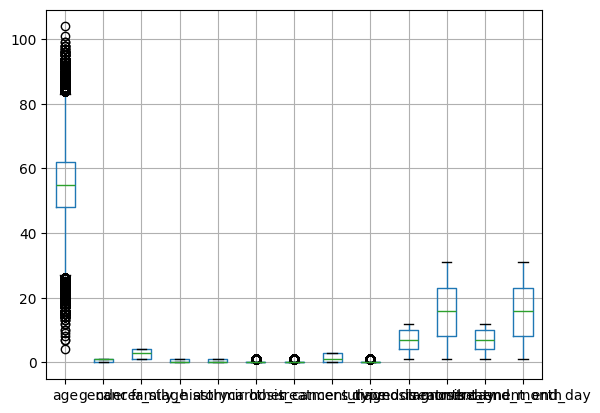

In [ ]:
df.boxplot()

In [ ]:
from numpy._core.defchararray import lower
def remove_outlier(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue

    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
  return df


df_cleaned=remove_outlier(df,exclude_column='survived')
df=df_cleaned


In [ ]:
df.shape

(627837, 13)

In [ ]:
df

,age,gender,cancer_stage,family_history,asthma,cirrhosis,other_cancer,treatment_type,survived,diagnosis.month,diagnosis.day,treatment_end_month,treatment_end_day
1,50.0,0,3,1,1,0,0,3,1,4,20,6,17
2,65.0,0,3,1,1,0,0,1,0,4,5,4,9
3,51.0,0,1,0,1,0,0,0,0,2,5,4,23
4,37.0,1,1,0,0,0,0,1,0,11,29,1,8
5,50.0,1,1,0,0,0,0,2,0,1,2,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889994,55.0,1,3,1,0,0,0,2,0,3,27,4,23
889996,62.0,0,2,1,0,0,0,3,0,9,27,6,19
889997,48.0,0,3,1,0,0,0,1,1,3,27,1,23
889998,67.0,0,4,1,1,0,0,0,0,12,22,12,12


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x=df[['age','gender','cancer_stage','family_history','asthma','cirrhosis','other_cancer','treatment_type','diagnosis.month',
      'diagnosis.day','treatment_end_month','treatment_end_day']]

y=df['survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02,random_state=40)

model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'baseline model accuracy:{accuracy:.2f}')

baseline model accuracy:0.78
